Planetary Radii: [0.5, 0.8660254037844386, 1.0898137920080415, 1.3714310181443292, 2.3753882025018935]


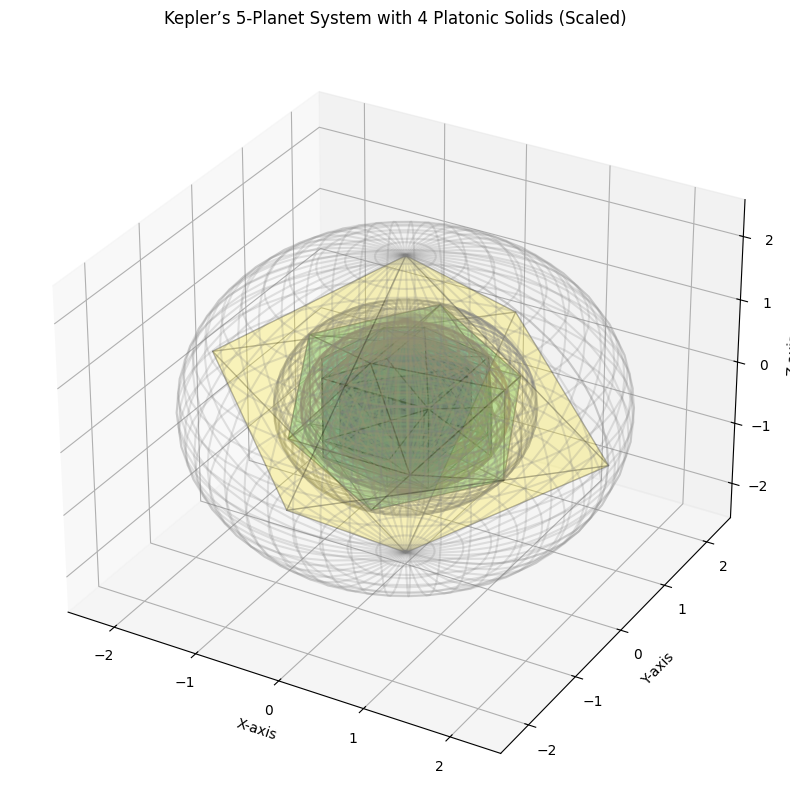

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

# Function to normalize vertices to a given radius
def normalize_to_sphere(vertices, radius):
    return radius * vertices / np.linalg.norm(vertices, axis=1)[:, np.newaxis]

def draw_solid(ax, vertices, color, line_alpha=0.3, shape_alpha=0.4):
    """
    Draw a Platonic solid using its vertices and a specified color.

    Parameters:
    ax: The 3D axis object.
    vertices: The vertices of the solid.
    color: The face color of the solid.
    line_alpha: The transparency of the edges (0.0 to 1.0).
    """
    hull = ConvexHull(vertices)
    for simplex in hull.simplices:
        # Create a Poly3DCollection with custom edge transparency
        poly = Poly3DCollection(
            [vertices[simplex]],
            alpha=shape_alpha,  # Transparency of the faces
            linewidths=1,  # Width of the edges
            edgecolors=(0, 0, 0, line_alpha),  # Edge color with transparency
            facecolor=color  # Face color
        )
        ax.add_collection3d(poly)

def kepler_platonic_model_fixed(N, solid_names):
    """
    Visualize Kepler's Platonic Model for N planets using N-1 Platonic solids.
    Each solid is scaled based on the ratio of its outer sphere radius (R) to its inner sphere radius (r).

    Parameters:
    N (int): Number of planets (2 ≤ N ≤ 6)
    solid_names (list of str): List of N-1 Platonic solids in the desired order
    """
    if not (2 <= N <= 6):
        raise ValueError("N must be between 2 and 6 (inclusive).")
    if len(solid_names) != N - 1:
        raise ValueError("The number of specified Platonic solids must be N-1.")

    platonic_solids = {
        "Tetrahedron": np.array([
            [1, 1, 1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1]
        ]),
        "Cube": np.array([
            [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],
            [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]
        ]),
        "Octahedron": np.array([
            [1, 0, 0], [-1, 0, 0], [0, 1, 0],
            [0, -1, 0], [0, 0, 1], [0, 0, -1]
        ]),
        "Dodecahedron": np.array([
            [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],
            [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1],
            [0, 0.618, 1.618], [0, 0.618, -1.618], [0, -0.618, 1.618], [0, -0.618, -1.618],
            [0.618, 1.618, 0], [0.618, -1.618, 0], [-0.618, 1.618, 0], [-0.618, -1.618, 0],
            [1.618, 0, 0.618], [1.618, 0, -0.618], [-1.618, 0, 0.618], [-1.618, 0, -0.618]
        ]),
        "Icosahedron": np.array([
            [0, 1, 1.618], [0, 1, -1.618], [0, -1, 1.618], [0, -1, -1.618],
            [1, 1.618, 0], [1, -1.618, 0], [-1, 1.618, 0], [-1, -1.618, 0],
            [1.618, 0, 1], [1.618, 0, -1], [-1.618, 0, 1], [-1.618, 0, -1]
        ])
    }

    platonic_radii = {
        "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
        "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
        "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
        "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
        "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
    }

    # Compute planetary radii
    planetary_radii = []
    previous_R = 0  # Initialize previous_R to ensure the first solid is scaled correctly

    for i, solid in enumerate(solid_names):
        if i == 0:
            # First solid: use its inner and outer sphere radii directly
            planetary_radii.append(platonic_radii[solid]["r"])  # Inner planet
            planetary_radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            planetary_radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R

    print("Planetary Radii:", planetary_radii)

    # Normalize vertices for the selected solids
    solid_vertices = {}
    for i, solid in enumerate(solid_names):
        if i == 0:
            # First solid: use its original vertices
            solid_vertices[solid] = normalize_to_sphere(platonic_solids[solid], platonic_radii[solid]["R"])
        else:
            # Subsequent solids: scale vertices to match the scaled_R
            scale_factor = planetary_radii[i + 1] / platonic_radii[solid]["R"]
            solid_vertices[solid] = normalize_to_sphere(platonic_solids[solid], planetary_radii[i + 1])

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Draw the selected Platonic solids
    colors = plt.cm.viridis(np.linspace(0, 1, len(solid_names)))  # Dynamic color mapping
    for i, solid in enumerate(solid_names):
        draw_solid(ax, solid_vertices[solid], colors[i], shape_alpha=0.31-i*0.05, line_alpha=0.31-i*0.05)

    # Create mesh for spherical shells (planetary orbits)
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0.0, np.pi, 25)
    for i, radius in enumerate(planetary_radii):
        x = np.outer(np.cos(u), np.sin(v)) * radius
        y = np.outer(np.sin(u), np.sin(v)) * radius
        z = np.outer(np.ones(np.size(u)), np.cos(v)) * radius
        ax.plot_wireframe(x, y, z, color='gray', alpha=0.61 - i * 0.1)

    # Set plot limits and labels
    lims = planetary_radii[-1] + 0.2
    ax.set_xlim([-lims, lims])
    ax.set_ylim([-lims, lims])
    ax.set_zlim([-lims, lims])
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title(f"Kepler’s {N}-Planet System with {N-1} Platonic Solids (Scaled)")

    # Show the plot
    plt.savefig("5_planets.png")
    plt.show()

# Example Usage
# kepler_platonic_model_fixed(2, ["Tetrahedron"])
# kepler_platonic_model_fixed(2, ["Cube"])
# kepler_platonic_model_fixed(2, ["Octahedron"])
kepler_platonic_model_fixed(5, ['Cube', 'Dodecahedron', 'Icosahedron', 'Octahedron'])

Planetary Radii: [1.1135163644116066, 1.4012585384440737, 1.7633557568774194]


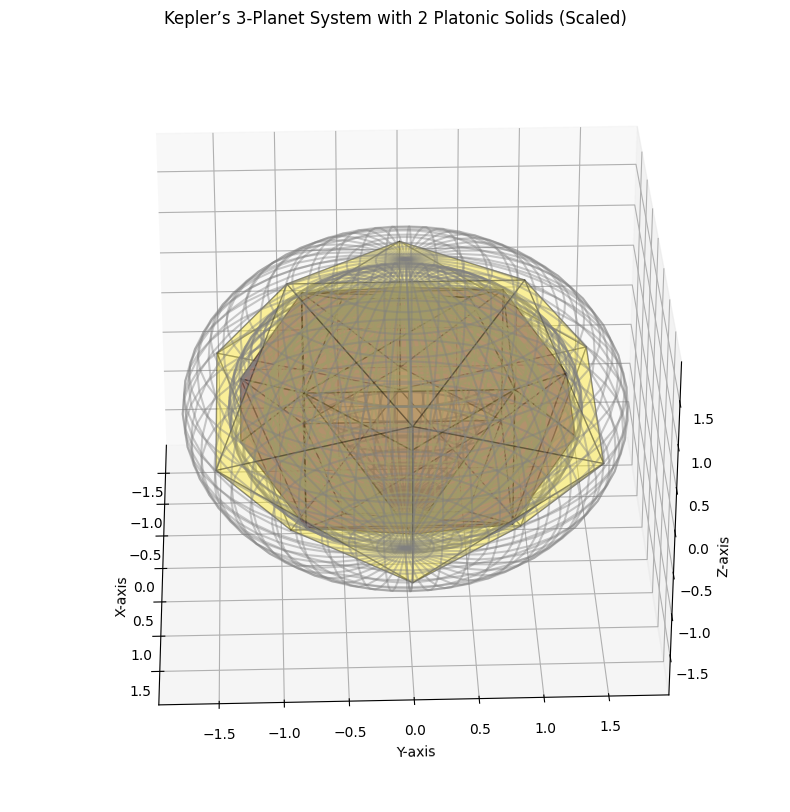

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
from matplotlib.animation import FuncAnimation

# Function to normalize vertices to a given radius
def normalize_to_sphere(vertices, radius):
    return radius * vertices / np.linalg.norm(vertices, axis=1)[:, np.newaxis]

# # Function to draw a Platonic solid
# def draw_solid(ax, vertices, color):
#     hull = ConvexHull(vertices)
#     for simplex in hull.simplices:
#         poly = Poly3DCollection([vertices[simplex]], alpha=0.3, linewidths=1, edgecolors="k", facecolor=color)
#         ax.add_collection3d(poly)

# Function to create the 3D plot and animation
def kepler_platonic_model_animation(N, solid_names, filename="kepler_animation.gif"):
    """
    Create a rotating 3D animation of Kepler's Platonic Model for N planets.

    Parameters:
    N (int): Number of planets (2 ≤ N ≤ 6)
    solid_names (list of str): List of N-1 Platonic solids in the desired order
    filename (str): Name of the output movie file (e.g., "kepler_animation.mp4")
    """
    if not (2 <= N <= 6):
        raise ValueError("N must be between 2 and 6 (inclusive).")
    if len(solid_names) != N - 1:
        raise ValueError("The number of specified Platonic solids must be N-1.")

    platonic_solids = {
        "Tetrahedron": np.array([
            [1, 1, 1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1]
        ]),
        "Cube": np.array([
            [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],
            [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]
        ]),
        "Octahedron": np.array([
            [1, 0, 0], [-1, 0, 0], [0, 1, 0],
            [0, -1, 0], [0, 0, 1], [0, 0, -1]
        ]),
        "Dodecahedron": np.array([
            [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],
            [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1],
            [0, 0.618, 1.618], [0, 0.618, -1.618], [0, -0.618, 1.618], [0, -0.618, -1.618],
            [0.618, 1.618, 0], [0.618, -1.618, 0], [-0.618, 1.618, 0], [-0.618, -1.618, 0],
            [1.618, 0, 0.618], [1.618, 0, -0.618], [-1.618, 0, 0.618], [-1.618, 0, -0.618]
        ]),
        "Icosahedron": np.array([
            [0, 1, 1.618], [0, 1, -1.618], [0, -1, 1.618], [0, -1, -1.618],
            [1, 1.618, 0], [1, -1.618, 0], [-1, 1.618, 0], [-1, -1.618, 0],
            [1.618, 0, 1], [1.618, 0, -1], [-1.618, 0, 1], [-1.618, 0, -1]
        ])
    }

    platonic_radii = {
        "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
        "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
        "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
        "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
        "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
    }

    # Compute planetary radii
    planetary_radii = []
    previous_R = 0  # Initialize previous_R to ensure the first solid is scaled correctly

    for i, solid in enumerate(solid_names):
        if i == 0:
            # First solid: use its inner and outer sphere radii directly
            planetary_radii.append(platonic_radii[solid]["r"])  # Inner planet
            planetary_radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            planetary_radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R

    print("Planetary Radii:", planetary_radii)

    # Normalize vertices for the selected solids
    solid_vertices = {}
    for i, solid in enumerate(solid_names):
        if i == 0:
            # First solid: use its original vertices
            solid_vertices[solid] = normalize_to_sphere(platonic_solids[solid], platonic_radii[solid]["R"])
        else:
            # Subsequent solids: scale vertices to match the scaled_R
            scale_factor = planetary_radii[i + 1] / platonic_radii[solid]["R"]
            solid_vertices[solid] = normalize_to_sphere(platonic_solids[solid], planetary_radii[i + 1])

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Draw the selected Platonic solids
    colors = plt.cm.viridis(np.linspace(0, 1, len(solid_names)))  # Dynamic color mapping
    for i, solid in enumerate(solid_names):
        draw_solid(ax, solid_vertices[solid], colors[i], shape_alpha=0.31-i*0.05, line_alpha=0.31-i*0.05)

    # Create mesh for spherical shells (planetary orbits)
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0.0, np.pi, 25)
    for i, radius in enumerate(planetary_radii):
        x = np.outer(np.cos(u), np.sin(v)) * radius
        y = np.outer(np.sin(u), np.sin(v)) * radius
        z = np.outer(np.ones(np.size(u)), np.cos(v)) * radius
        ax.plot_wireframe(x, y, z, color='gray', alpha=0.61 - i * 0.1)

    # Set plot limits and labels
    lims = planetary_radii[-1] + 0.2
    ax.set_xlim([-lims, lims])
    ax.set_ylim([-lims, lims])
    ax.set_zlim([-lims, lims])
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title(f"Kepler’s {N}-Planet System with {N-1} Platonic Solids (Scaled)")

    # Animation function
    def update(frame):
        ax.view_init(elev=30, azim=frame)  # Rotate the view
        return ax

    # Create the animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

    # Save the animation as a movie file
    anim.save(filename, writer="pillow", fps=10)

    # Show the plot
    plt.show()

# Example Usage
kepler_platonic_model_animation(3, ["Dodecahedron", "Icosahedron"], filename="kepler_animation.gif")

In [66]:
import numpy as np
from itertools import permutations

number_solids = 2

# Outer and inner sphere radii for each Platonic solid
platonic_radii = {
    "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
    "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
    "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
    "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
    "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
}

# List of Platonic solids
platonic_solids_list = ["Tetrahedron", "Cube", "Octahedron", "Dodecahedron", "Icosahedron"]

# Generate all permutations of the 5 Platonic solids
all_configurations = list(permutations(platonic_solids_list, number_solids))

# Function to compute cumulative radii for a configuration
def compute_cumulative_radii(config):
    radii = []
    previous_R = 0
    for i, solid in enumerate(config):
        if i == 0:
            # First solid: use its inner and outer radii directly
            radii.append(platonic_radii[solid]["r"])  # Inner planet
            radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R
    return radii

# Function to compute adjacent ratios for a list of radii
def compute_adjacent_ratios(radii):
    ratios = []
    for i in range(1, len(radii)):
        ratios.append(radii[i] / radii[i - 1])
    return ratios

# Array to store all adjacent ratios
all_adjacent_ratios = []

# Open a text file to write the configurations and ratios
with open("configurations_and_ratios.txt", "w") as file:
    # Generate the list of adjacent ratios for all configurations
    for config in all_configurations:
        radii = compute_cumulative_radii(config)
        adjacent_ratios = compute_adjacent_ratios(radii)
        all_adjacent_ratios.append(adjacent_ratios)  # Store in array
        # Write configuration and ratios to file
        file.write(f"Configuration: {config}, Adjacent Ratios: {adjacent_ratios}\n")

# Function to round ratios to 4 significant digits
def round_ratios(ratios, sig_digits=5):
    return [round(ratio, sig_digits - 1) for ratio in ratios]

# Convert the list of adjacent ratios to a set of tuples (rounded to 4 significant digits)
unique_adjacent_ratios = set(tuple(round_ratios(ratios)) for ratios in all_adjacent_ratios)

# Print the number of unique solutions
print(f"Number of unique solutions for pairwise planet radius ratios: {len(unique_adjacent_ratios)}")

# Print only the unique adjacent ratios (rounded to 4 significant digits)
print("Unique Adjacent Ratios (4 significant digits):")
for i, ratios in enumerate(unique_adjacent_ratios):
    print(i, ratios)


# # Convert the list of adjacent ratios to a set of tuples to remove duplicates
# unique_adjacent_ratios = set(tuple(ratios) for ratios in all_adjacent_ratios)

# # Print only the unique adjacent ratios
# print("Unique Adjacent Ratios:")
# for i, ratios in enumerate(unique_adjacent_ratios):
#     print(i, ratios)

Number of unique solutions for pairwise planet radius ratios: 8
Unique Adjacent Ratios (4 significant digits):
0 (1.7321, 3.0)
1 (3.0, 1.2584)
2 (1.2584, 3.0)
3 (3.0, 1.7321)
4 (1.7321, 1.2584)
5 (1.2584, 1.2584)
6 (1.7321, 1.7321)
7 (1.2584, 1.7321)


In [50]:
# Full executable Python code to correctly organize exoplanet data
# Ensures:
# - Planets are sorted based on available non-NaN values (semi-major axis first, period second)
# - Missing values are estimated using Kepler's Third Law (a^3 ~ p^2)
# - Period and semi-major axis ratios are computed for adjacent planet pairs

import numpy as np
import pandas as pd

# Define Kepler's Third Law function to estimate missing values
def estimate_missing_values(periods, semi_major_axes):
    """
    Estimates missing periods or semi-major axes using Kepler's Third Law: a^3 ~ p^2.
    Modifies the input lists in-place.
    """
    for i in range(len(periods)):
        if periods[i] is None and semi_major_axes[i] is not None:
            periods[i] = semi_major_axes[i] ** (3 / 2)  # Estimate period
        elif semi_major_axes[i] is None and periods[i] is not None:
            semi_major_axes[i] = periods[i] ** (2 / 3)  # Estimate semi-major axis



# Read the CSV file
file_path = "./PS_2025.03.02_07.51.45.csv"
df_exoplanets = pd.read_csv(file_path, comment='#')

# Select relevant columns
columns_needed = ["hostname", "pl_orbper", "pl_orbsmax"]
df_filtered = df_exoplanets[columns_needed]

# Convert all missing values (NaN) to None for easier processing
df_filtered = df_filtered.where(pd.notna(df_filtered), None)

# Dictionary to store system-level data
star_systems = {}

# Process the dataset
for host, group in df_filtered.groupby("hostname"):
    # Drop rows where both period and semi-major axis are missing
    group = group.dropna(subset=["pl_orbper", "pl_orbsmax"], how="all")

    # Create a new sorting column that prioritizes non-NaN values
    group["sort_value"] = group["pl_orbsmax"].combine_first(group["pl_orbper"])

    # Sort planets within each system by the available non-NaN value
    sorted_group = group.sort_values(by="sort_value", ascending=True).drop(columns=["sort_value"])

    # Extract periods and semi-major axes while maintaining their correct pairing
    periods = sorted_group["pl_orbper"].tolist()
    semi_major_axes = sorted_group["pl_orbsmax"].tolist()

    # Ensure both are sorted together (i.e., associated periods and semi-major axes stay aligned)
    combined = sorted(zip(semi_major_axes, periods))  # Sort both together based on available non-NaN values
    semi_major_axes, periods = zip(*combined)  # Unpack into separate lists

    # Convert tuples back to lists
    semi_major_axes = list(semi_major_axes)
    periods = list(periods)

    # Estimate missing values using Kepler's Third Law
    estimate_missing_values(periods, semi_major_axes)

    # Compute adjacent ratios
    period_ratios = [periods[i] / periods[i - 1] for i in range(1, len(periods))]
    semi_major_ratios = [semi_major_axes[i] / semi_major_axes[i - 1] for i in range(1, len(semi_major_axes))]

    # Store updated values in dictionary
    star_systems[host] = {
        "num_planets": len(periods),
        "periods": periods,
        "semi_major_axes": semi_major_axes,
        "period_ratios": period_ratios,
        "semi_major_ratios": semi_major_ratios
    }

# Function to calculate semi-major axis using Kepler's Third Law assuming solar mass
def kepler_a_from_p(periods, stellar_mass=1.0):
    """
    Estimates semi-major axis (a) from known period (P) using Kepler's Third Law.
    Assumes host star mass is similar to the Sun.
    
    Kepler's Third Law in AU and years:
        a^3 = P^2 * M_star
    where M_star is the mass of the host star (assumed to be 1.0 solar masses here).
    Periods must be converted to years before calculation.
    """
    semi_major_axes = []
    for P in periods:
        if not np.isnan(P):  # Check for NaN
            P_years = P / 365.25  # Convert days to years
            a = (P_years ** 2 / stellar_mass) ** (1 / 3)  # Solve for a in AU
            semi_major_axes.append(a)
        else:
            semi_major_axes.append(np.nan)  # Preserve missing values
    return semi_major_axes

# Apply Kepler's Third Law to estimate missing semi-major axes from known periods
for system in star_systems.values():
    if any(np.isnan(a) for a in system["semi_major_axes"]):  # Check for NaN instead of None
        system["semi_major_axes"] = kepler_a_from_p(system["periods"])

# Recalculate period and semi-major axis ratios after filling missing values
for system in star_systems.values():
    system["period_ratios"] = [system["periods"][i] / system["periods"][i - 1] for i in range(1, len(system["periods"]))]
    system["semi_major_ratios"] = [system["semi_major_axes"][i] / system["semi_major_axes"][i - 1] for i in range(1, len(system["semi_major_axes"]))]

# Convert dictionary back to DataFrame
df_star_systems = pd.DataFrame.from_dict(star_systems, orient="index").reset_index()
df_star_systems.rename(columns={"index": "hostname"}, inplace=True)

# Display the updated dataset with Kepler-based semi-major axes filled in
df_star_systems.head()


/var/folders/zp/tlhhnp1941g9lvbvtdrxjl_r0000gp/T/ipykernel_71959/4000596884.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["sort_value"] = group["pl_orbsmax"].combine_first(group["pl_orbper"])


,hostname,num_planets,periods,semi_major_axes,period_ratios,semi_major_ratios
0,2MASS J19383260+4603591,3,"[43.0, 406.0, 1460.0]","[0.24020690489919427, 1.07305967011471, 2.5186...","[9.44186046511628, 3.5960591133004924]","[4.467230742451107, 2.347206044033353]"
1,47 UMa,3,"[1078.0, 2391.0, 14002.0]","[2.1, 3.6, 11.6]","[2.217996289424861, 5.856127143454621]","[1.7142857142857142, 3.222222222222222]"
2,55 Cnc,5,"[0.7365474, 14.6516, 44.3989, 259.88, 5574.2]","[0.01544, 0.1134, 0.2373, 0.7708, 5.957]","[19.892270341324945, 3.0303106827923227, 5.853...","[7.344559585492227, 2.0925925925925926, 3.2482..."
3,61 Vir,3,"[4.215, 38.021, 123.01]","[0.050201, 0.2175, 0.476]","[9.020403321470937, 3.235317324636385]","[4.332583016274576, 2.188505747126437]"
4,AU Mic,3,"[8.46308, 18.85969, 12.73596]","[0.08127534363757154, 0.13866373164387666, 0.1...","[2.228466468472471, 0.6753006014414871]","[1.7060983742156204, 0.7697176129334236]"


In [51]:
N_planets = 3
diff_arr = []

for _, row in df_star_systems[df_star_systems["num_planets"] == N_planets].iterrows():
    diff_tmp = []
    row_ratios = np.array(row["semi_major_ratios"])  # Convert row data to NumPy array

    for ratio in unique_adjacent_ratios:
        ratio_array = np.array(ratio)  # Convert tuple to NumPy array
        diff_tmp.append(np.sum((row_ratios - ratio_array) ** 2))  # Element-wise subtraction
    
    diff_arr.append(np.min(diff_tmp))  # Store the minimum difference

# Sort indices by smallest difference
ind = np.argsort(diff_arr)

# Print only the top 10 matches with correct formatting
for i in ind[0:10]:
    system = df_star_systems[df_star_systems["num_planets"] == N_planets].iloc[i]
    
    print(
        system["hostname"], 
        [round(p, 5) for p in system["periods"]],  # Round periods
        [round(r, 5) for r in system["semi_major_ratios"]],  # Round ratios
        f"{diff_arr[i]:.5e}"  # Format diff_arr in scientific notation with 5 significant digits
    )


Kepler-271 [5.24973, 7.41086, 10.43548] [1.25841, 1.25631] 4.38141e-06
Teegarden's Star [4.90634, 11.416, 26.13] [1.75676, 1.73846] 6.48425e-04
K2-198 [3.35961, 7.45002, 17.04287] [1.70051, 1.73616] 1.01439e-03
Kepler-359 [25.56322, 57.68802, 77.09569] [1.72472, 1.21173] 2.23290e-03
K2-37 [4.44117, 6.42904, 14.09189] [1.27984, 1.68654] 2.53514e-03
Kepler-1468 [3.54553, 8.23985, 19.5906] [1.75452, 1.78136] 2.92952e-03
Kepler-226 [3.941, 5.34955, 8.10904] [1.23404, 1.31034] 3.29155e-03
Kepler-23 [7.1, 10.74, 15.27] [1.31774, 1.26442] 3.55774e-03
Kepler-339 [4.97766, 6.98806, 10.55834] [1.25455, 1.31884] 3.66792e-03
TOI-1260 [3.12746, 7.49313, 16.60816] [1.79019, 1.69863] 4.49477e-03


In [60]:
import numpy as np
from itertools import permutations

number_solids = 3

# Outer and inner sphere radii for each Platonic solid
platonic_radii = {
    "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
    "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
    "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
    "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
    "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
}

# List of Platonic solids
platonic_solids_list = ["Tetrahedron", "Cube", "Octahedron", "Dodecahedron", "Icosahedron"]

# Generate all permutations of the 5 Platonic solids
all_configurations = list(permutations(platonic_solids_list, number_solids))

# Function to compute cumulative radii for a configuration
def compute_cumulative_radii(config):
    radii = []
    previous_R = 0
    for i, solid in enumerate(config):
        if i == 0:
            # First solid: use its inner and outer radii directly
            radii.append(platonic_radii[solid]["r"])  # Inner planet
            radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R
    return radii

# Function to compute adjacent ratios for a list of radii
def compute_adjacent_ratios(radii):
    ratios = []
    for i in range(1, len(radii)):
        ratios.append(radii[i] / radii[i - 1])
    return ratios

# Array to store all adjacent ratios
all_adjacent_ratios = []

# Open a text file to write the configurations and ratios
with open("configurations_and_ratios.txt", "w") as file:
    # Generate the list of adjacent ratios for all configurations
    for config in all_configurations:
        radii = compute_cumulative_radii(config)
        adjacent_ratios = compute_adjacent_ratios(radii)
        all_adjacent_ratios.append(adjacent_ratios)  # Store in array
        # Write configuration and ratios to file
        file.write(f"Configuration: {config}, Adjacent Ratios: {adjacent_ratios}\n")

# Function to round ratios to 4 significant digits
def round_ratios(ratios, sig_digits=5):
    return [round(ratio, sig_digits - 1) for ratio in ratios]

# Convert the list of adjacent ratios to a set of tuples (rounded to 4 significant digits)
unique_adjacent_ratios = set(tuple(round_ratios(ratios)) for ratios in all_adjacent_ratios)

# Print the number of unique solutions
print(f"Number of unique solutions for pairwise planet radius ratios: {len(unique_adjacent_ratios)}")

# Print only the unique adjacent ratios (rounded to 4 significant digits)
print("Unique Adjacent Ratios (4 significant digits):")
for i, ratios in enumerate(unique_adjacent_ratios):
    print(i, ratios)


# # Convert the list of adjacent ratios to a set of tuples to remove duplicates
# unique_adjacent_ratios = set(tuple(ratios) for ratios in all_adjacent_ratios)

# # Print only the unique adjacent ratios
# print("Unique Adjacent Ratios:")
# for i, ratios in enumerate(unique_adjacent_ratios):
#     print(i, ratios)

Number of unique solutions for pairwise planet radius ratios: 18
Unique Adjacent Ratios (4 significant digits):
0 (1.7321, 1.2584, 3.0)
1 (1.2584, 1.2584, 3.0)
2 (1.7321, 3.0, 1.7321)
3 (1.2584, 3.0, 1.2584)
4 (1.7321, 1.7321, 3.0)
5 (1.2584, 1.7321, 1.2584)
6 (1.7321, 1.2584, 1.2584)
7 (1.2584, 1.7321, 1.7321)
8 (3.0, 1.7321, 1.2584)
9 (1.2584, 3.0, 1.7321)
10 (3.0, 1.2584, 1.2584)
11 (1.2584, 1.2584, 1.7321)
12 (3.0, 1.7321, 1.7321)
13 (3.0, 1.2584, 1.7321)
14 (1.7321, 1.2584, 1.7321)
15 (1.7321, 1.7321, 1.2584)
16 (1.2584, 1.7321, 3.0)
17 (1.7321, 3.0, 1.2584)


In [61]:
N_planets = 4
diff_arr = []

for _, row in df_star_systems[df_star_systems["num_planets"] == N_planets].iterrows():
    diff_tmp = []
    row_ratios = np.array(row["semi_major_ratios"])  # Convert row data to NumPy array

    for ratio in unique_adjacent_ratios:
        ratio_array = np.array(ratio)  # Convert tuple to NumPy array
        diff_tmp.append(np.sum((row_ratios - ratio_array) ** 2))  # Element-wise subtraction
    
    diff_arr.append(np.min(diff_tmp))  # Store the minimum difference

# Sort indices by smallest difference
ind = np.argsort(diff_arr)

# Print only the top 10 matches with correct formatting
for i in ind[0:10]:
    system = df_star_systems[df_star_systems["num_planets"] == N_planets].iloc[i]
    
    print(
        system["hostname"], 
        [round(p, 5) for p in system["periods"]],  # Round periods
        [round(r, 5) for r in system["semi_major_ratios"]],  # Round ratios
        f"{diff_arr[i]:.5e}"  # Format diff_arr in scientific notation with 5 significant digits
    )


HD 215152 [5.75999, 7.28243, 10.86499, 25.1967] [1.16925, 1.30563, 1.75213] 1.05799e-02
K2-133 [3.07133, 4.86784, 11.02454, 26.5841] [1.35911, 1.72472, 1.79778] 1.45114e-02
K2-32 [4.34934, 8.992, 20.66093, 31.71701] [1.62278, 1.74126, 1.33078] 1.72737e-02
Kepler-215 [9.36067, 14.66711, 30.86442, 68.16101] [1.34524, 1.63717, 1.6973] 1.77641e-02
GJ 3293 [13.2543, 30.5987, 48.1345, 122.6196] [1.74695, 1.35254, 1.86527] 2.68157e-02
V1298 Tau [8.24958, 12.4032, 24.1396, 53.5] [1.31241, 1.55883, 1.69987] 3.39793e-02
Kepler-306 [4.64619, 7.24019, 17.32664, 44.84098] [1.34, 1.79104, 1.89167] 3.55946e-02
Kepler-265 [6.84626, 17.02894, 43.13062, 67.83102] [1.84058, 1.85827, 1.35169] 3.63901e-02
K2-72 [5.57721, 7.76018, 15.18903, 24.15887] [1.25, 1.56, 1.35897] 3.98042e-02
Kepler-305 [3.20538, 5.487, 8.291, 16.74] [1.43099, 1.31678, 1.59747] 5.13220e-02


In [67]:
import numpy as np
from itertools import permutations

number_solids = 4

# Outer and inner sphere radii for each Platonic solid
platonic_radii = {
    "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
    "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
    "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
    "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
    "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
}

# List of Platonic solids
platonic_solids_list = ["Tetrahedron", "Cube", "Octahedron", "Dodecahedron", "Icosahedron"]

# Generate all permutations of the 5 Platonic solids
all_configurations = list(permutations(platonic_solids_list, number_solids))

# Function to compute cumulative radii for a configuration
def compute_cumulative_radii(config):
    radii = []
    previous_R = 0
    for i, solid in enumerate(config):
        if i == 0:
            # First solid: use its inner and outer radii directly
            radii.append(platonic_radii[solid]["r"])  # Inner planet
            radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R
    return radii

# Function to compute adjacent ratios for a list of radii
def compute_adjacent_ratios(radii):
    ratios = []
    for i in range(1, len(radii)):
        ratios.append(radii[i] / radii[i - 1])
    return ratios

# Array to store all adjacent ratios
all_adjacent_ratios = []

# Open a text file to write the configurations and ratios
with open("configurations_and_ratios.txt", "w") as file:
    # Generate the list of adjacent ratios for all configurations
    for config in all_configurations:
        radii = compute_cumulative_radii(config)
        adjacent_ratios = compute_adjacent_ratios(radii)
        all_adjacent_ratios.append(adjacent_ratios)  # Store in array
        # Write configuration and ratios to file
        file.write(f"Configuration: {config}, Adjacent Ratios: {adjacent_ratios}\n")

# Function to round ratios to 4 significant digits
def round_ratios(ratios, sig_digits=5):
    return [round(ratio, sig_digits - 1) for ratio in ratios]

# Convert the list of adjacent ratios to a set of tuples (rounded to 4 significant digits)
unique_adjacent_ratios = set(tuple(round_ratios(ratios)) for ratios in all_adjacent_ratios)

# Print the number of unique solutions
print(f"Number of unique solutions for pairwise planet radius ratios: {len(unique_adjacent_ratios)}")

# Print only the unique adjacent ratios (rounded to 4 significant digits)
print("Unique Adjacent Ratios (4 significant digits):")
for i, ratios in enumerate(unique_adjacent_ratios):
    print(i, ratios)


# # Convert the list of adjacent ratios to a set of tuples to remove duplicates
# unique_adjacent_ratios = set(tuple(ratios) for ratios in all_adjacent_ratios)

# # Print only the unique adjacent ratios
# print("Unique Adjacent Ratios:")
# for i, ratios in enumerate(unique_adjacent_ratios):
#     print(i, ratios)

Number of unique solutions for pairwise planet radius ratios: 30
Unique Adjacent Ratios (4 significant digits):
0 (1.2584, 1.7321, 1.2584, 3.0)
1 (3.0, 1.2584, 1.7321, 1.2584)
2 (1.7321, 1.2584, 1.2584, 3.0)
3 (1.7321, 3.0, 1.7321, 1.2584)
4 (1.7321, 3.0, 1.2584, 1.2584)
5 (1.7321, 1.7321, 3.0, 1.2584)
6 (1.2584, 3.0, 1.7321, 1.7321)
7 (1.2584, 1.2584, 1.7321, 3.0)
8 (1.2584, 1.7321, 3.0, 1.7321)
9 (1.7321, 1.7321, 1.2584, 1.2584)
10 (1.7321, 1.2584, 3.0, 1.7321)
11 (3.0, 1.7321, 1.2584, 1.7321)
12 (1.2584, 3.0, 1.2584, 1.7321)
13 (1.7321, 1.7321, 1.2584, 3.0)
14 (1.7321, 1.2584, 1.2584, 1.7321)
15 (1.2584, 1.7321, 1.2584, 1.7321)
16 (1.2584, 1.2584, 3.0, 1.7321)
17 (1.7321, 3.0, 1.2584, 1.7321)
18 (3.0, 1.2584, 1.7321, 1.7321)
19 (3.0, 1.2584, 1.2584, 1.7321)
20 (1.2584, 3.0, 1.7321, 1.2584)
21 (1.7321, 1.2584, 3.0, 1.2584)
22 (1.2584, 1.2584, 1.7321, 1.7321)
23 (3.0, 1.7321, 1.7321, 1.2584)
24 (1.2584, 1.7321, 3.0, 1.2584)
25 (3.0, 1.7321, 1.2584, 1.2584)
26 (1.7321, 1.2584, 1.7321, 

In [68]:
N_planets = 5
diff_arr = []

for _, row in df_star_systems[df_star_systems["num_planets"] == N_planets].iterrows():
    diff_tmp = []
    row_ratios = np.array(row["semi_major_ratios"])  # Convert row data to NumPy array

    for ratio in unique_adjacent_ratios:
        ratio_array = np.array(ratio)  # Convert tuple to NumPy array
        diff_tmp.append(np.sum((row_ratios - ratio_array) ** 2))  # Element-wise subtraction
    
    diff_arr.append(np.min(diff_tmp))  # Store the minimum difference

# Sort indices by smallest difference
ind = np.argsort(diff_arr)

# Print only the top 10 matches with correct formatting
for i in ind[0:10]:
    system = df_star_systems[df_star_systems["num_planets"] == N_planets].iloc[i]
    
    print(
        system["hostname"], 
        [round(p, 5) for p in system["periods"]],  # Round periods
        [round(r, 5) for r in system["semi_major_ratios"]],  # Round ratios
        f"{diff_arr[i]:.5e}"  # Format diff_arr in scientific notation with 5 significant digits
    )


K2-268 [2.15168, 4.5286, 6.13124, 9.32753, 26.27057] [1.64232, 1.22384, 1.32275, 1.99435] 8.21728e-02
Kepler-122 [5.76619, 12.46599, 21.58748, 37.99327, 56.268] [1.67196, 1.44206, 1.45771, 1.29928] 1.14312e-01
Kepler-33 [5.66793, 13.17562, 21.77596, 31.7844, 41.02902] [1.75628, 1.39781, 1.2864, 1.18569] 1.18403e-01
HD 23472 [3.97664, 7.90754, 12.16218, 17.66709, 29.79749] [1.58213, 1.33235, 1.28256, 1.41652] 1.28132e-01
HD 108236 [3.79596, 6.20345, 14.17568, 19.59003, 29.54115] [1.36956, 1.73226, 1.27281, 1.28603] 1.32406e-01
Kepler-82 [2.38296, 5.90221, 26.44, 51.54, 75.732] [1.85294, 2.67143, 1.56031, 1.29284] 1.53260e-01
Kepler-292 [2.58083, 3.71534, 7.05568, 11.97901, 20.83424] [1.28571, 1.51111, 1.42647, 1.45361] 1.55388e-01
K2-384 [2.23153, 4.19477, 6.67958, 9.71504, 13.62749] [1.52313, 1.36362, 1.2837, 1.25309] 1.80112e-01
Kepler-296 [5.84164, 10.86438, 19.85029, 34.14211, 63.33627] [1.51631, 1.49367, 1.4322, 1.50888] 1.81952e-01
Kepler-55 [2.2111, 4.61753, 10.19854, 27.94814, 4

In [70]:
import numpy as np
from itertools import permutations

number_solids = 5

# Outer and inner sphere radii for each Platonic solid
platonic_radii = {
    "Tetrahedron": {"R": np.sqrt(6) / 4, "r": np.sqrt(6) / 12},
    "Cube": {"R": np.sqrt(3) / 2, "r": 1 / 2},
    "Octahedron": {"R": np.sqrt(2) / 2, "r": np.sqrt(6) / 6},
    "Dodecahedron": {"R": 0.25 * (np.sqrt(3) + np.sqrt(15)), "r": 0.5 * np.sqrt(25 + 11 * np.sqrt(5)) / np.sqrt(10)},
    "Icosahedron": {"R": np.sqrt(10 + 2 * np.sqrt(5)) / 4, "r": np.sqrt(3) / 12. * (3 + np.sqrt(5))}
}

# List of Platonic solids
platonic_solids_list = ["Tetrahedron", "Cube", "Octahedron", "Dodecahedron", "Icosahedron"]

# Generate all permutations of the 5 Platonic solids
all_configurations = list(permutations(platonic_solids_list, number_solids))

# Function to compute cumulative radii for a configuration
def compute_cumulative_radii(config):
    radii = []
    previous_R = 0
    for i, solid in enumerate(config):
        if i == 0:
            # First solid: use its inner and outer radii directly
            radii.append(platonic_radii[solid]["r"])  # Inner planet
            radii.append(platonic_radii[solid]["R"])  # Outer planet
            previous_R = platonic_radii[solid]["R"]  # Update previous_R
        else:
            # Subsequent solids: scale based on the ratio of R to r
            scaling_factor = platonic_radii[solid]["R"] / platonic_radii[solid]["r"]
            scaled_R = previous_R * scaling_factor
            radii.append(scaled_R)  # Outer planet
            previous_R = scaled_R  # Update previous_R
    return radii

# Function to compute adjacent ratios for a list of radii
def compute_adjacent_ratios(radii):
    ratios = []
    for i in range(1, len(radii)):
        ratios.append(radii[i] / radii[i - 1])
    return ratios

# Array to store all adjacent ratios
all_adjacent_ratios = []

# Open a text file to write the configurations and ratios
with open("configurations_and_ratios.txt", "w") as file:
    # Generate the list of adjacent ratios for all configurations
    for config in all_configurations:
        radii = compute_cumulative_radii(config)
        adjacent_ratios = compute_adjacent_ratios(radii)
        all_adjacent_ratios.append(adjacent_ratios)  # Store in array
        # Write configuration and ratios to file
        file.write(f"Configuration: {config}, Adjacent Ratios: {adjacent_ratios}\n")

# Function to round ratios to 4 significant digits
def round_ratios(ratios, sig_digits=5):
    return [round(ratio, sig_digits - 1) for ratio in ratios]

# Convert the list of adjacent ratios to a set of tuples (rounded to 4 significant digits)
unique_adjacent_ratios = set(tuple(round_ratios(ratios)) for ratios in all_adjacent_ratios)

# Print the number of unique solutions
print(f"Number of unique solutions for pairwise planet radius ratios: {len(unique_adjacent_ratios)}")

# Print only the unique adjacent ratios (rounded to 4 significant digits)
print("Unique Adjacent Ratios (4 significant digits):")
for i, ratios in enumerate(unique_adjacent_ratios):
    print(i, ratios)


# # Convert the list of adjacent ratios to a set of tuples to remove duplicates
# unique_adjacent_ratios = set(tuple(ratios) for ratios in all_adjacent_ratios)

# # Print only the unique adjacent ratios
# print("Unique Adjacent Ratios:")
# for i, ratios in enumerate(unique_adjacent_ratios):
#     print(i, ratios)

Number of unique solutions for pairwise planet radius ratios: 30
Unique Adjacent Ratios (4 significant digits):
0 (1.2584, 3.0, 1.7321, 1.2584, 1.7321)
1 (1.7321, 3.0, 1.2584, 1.2584, 1.7321)
2 (1.2584, 1.7321, 1.7321, 3.0, 1.2584)
3 (1.7321, 1.2584, 1.2584, 1.7321, 3.0)
4 (1.2584, 1.7321, 1.7321, 1.2584, 3.0)
5 (1.7321, 1.2584, 3.0, 1.7321, 1.2584)
6 (1.2584, 1.7321, 3.0, 1.2584, 1.7321)
7 (1.2584, 3.0, 1.7321, 1.7321, 1.2584)
8 (3.0, 1.2584, 1.2584, 1.7321, 1.7321)
9 (1.7321, 1.7321, 1.2584, 3.0, 1.2584)
10 (1.7321, 3.0, 1.7321, 1.2584, 1.2584)
11 (1.2584, 1.2584, 3.0, 1.7321, 1.7321)
12 (3.0, 1.7321, 1.2584, 1.2584, 1.7321)
13 (3.0, 1.2584, 1.7321, 1.2584, 1.7321)
14 (1.2584, 3.0, 1.2584, 1.7321, 1.7321)
15 (1.7321, 3.0, 1.2584, 1.7321, 1.2584)
16 (1.7321, 1.2584, 1.7321, 3.0, 1.2584)
17 (1.7321, 1.2584, 1.2584, 3.0, 1.7321)
18 (1.2584, 1.7321, 1.2584, 1.7321, 3.0)
19 (1.2584, 1.2584, 1.7321, 1.7321, 3.0)
20 (3.0, 1.7321, 1.7321, 1.2584, 1.2584)
21 (1.7321, 1.7321, 1.2584, 1.2584, 3

In [71]:
N_planets = 6
diff_arr = []

for _, row in df_star_systems[df_star_systems["num_planets"] == N_planets].iterrows():
    diff_tmp = []
    row_ratios = np.array(row["semi_major_ratios"])  # Convert row data to NumPy array

    for ratio in unique_adjacent_ratios:
        ratio_array = np.array(ratio)  # Convert tuple to NumPy array
        diff_tmp.append(np.sum((row_ratios - ratio_array) ** 2))  # Element-wise subtraction
    
    diff_arr.append(np.min(diff_tmp))  # Store the minimum difference

# Sort indices by smallest difference
ind = np.argsort(diff_arr)

# Print only the top 10 matches with correct formatting
for i in ind[0:10]:
    system = df_star_systems[df_star_systems["num_planets"] == N_planets].iloc[i]
    
    print(
        system["hostname"], 
        [round(p, 5) for p in system["periods"]],  # Round periods
        [round(r, 5) for r in system["semi_major_ratios"]],  # Round ratios
        f"{diff_arr[i]:.5e}"  # Format diff_arr in scientific notation with 5 significant digits
    )


HD 34445 [49.175, 117.87, 214.67, 676.8, 1049.0, 5700.0] [1.79271, 1.49076, 2.14873, 1.34154, 3.07246] 2.43406e-01
K2-138 [2.35309, 3.56004, 5.40479, 8.26146, 12.75758, 41.96797] [1.31787, 1.321, 1.327, 1.33593, 2.21202] 9.49420e-01
Kepler-80 [0.98679, 3.07222, 4.64489, 7.05246, 9.52355, 14.64558] [2.13216, 1.31729, 1.32102, 1.22172, 1.33231] 1.08678e+00
HD 10180 [5.75969, 16.357, 49.748, 122.744, 604.67, 2205.0] [2.00546, 2.09892, 1.82623, 2.89511, 2.36931] 1.43212e+00
Kepler-11 [10.3039, 13.0241, 22.6845, 31.9996, 46.6888, 118.3807] [1.17582, 1.4486, 1.25806, 1.28205, 1.864] 1.58023e+00
Kepler-20 [3.6961, 6.09849, 10.85408, 19.57833, 34.94, 77.61146] [1.3954, 1.46939, 1.48184, 1.48161, 1.69051] 1.90342e+00
TOI-178 [1.91456, 3.23845, 6.5577, 9.96188, 15.23192, 20.7095] [1.41926, 1.6, 1.32264, 1.32695, 1.22714] 2.22712e+00
TOI-1136 [4.1727, 6.2574, 12.5199, 26.321, 39.545, 18.801] [1.31014, 1.58783, 1.6411, 1.31178, 0.60915] 2.46830e+00
HD 191939 [8.88033, 28.57974, 38.35304, 101.12, 2

In [58]:
import numpy as np

# Orbital periods (in Earth years) for the inner six planets of the Solar System
solar_system_periods = [0.240846, 0.615, 1.0, 1.881, 11.86, 29.46]  # Mercury, Venus, Earth, Mars, Jupiter, Saturn

# Compute period ratios for adjacent planets
solar_system_period_ratios = [solar_system_periods[i] / solar_system_periods[i - 1] for i in range(1, len(solar_system_periods))]

# Unique adjacent ratios given for comparison
unique_adjacent_ratios = [
    (1.2584, 3.0, 1.7321, 1.2584, 1.7321), (1.7321, 3.0, 1.2584, 1.2584, 1.7321),
    (1.2584, 1.7321, 1.7321, 3.0, 1.2584), (1.7321, 1.2584, 1.2584, 1.7321, 3.0),
    (1.2584, 1.7321, 1.7321, 1.2584, 3.0), (1.7321, 1.2584, 3.0, 1.7321, 1.2584),
    (1.2584, 1.7321, 3.0, 1.2584, 1.7321), (1.2584, 3.0, 1.7321, 1.7321, 1.2584),
    (3.0, 1.2584, 1.2584, 1.7321, 1.7321), (1.7321, 1.7321, 1.2584, 3.0, 1.2584),
    (1.7321, 3.0, 1.7321, 1.2584, 1.2584), (1.2584, 1.2584, 3.0, 1.7321, 1.7321),
    (3.0, 1.7321, 1.2584, 1.2584, 1.7321), (3.0, 1.2584, 1.7321, 1.2584, 1.7321),
    (1.2584, 3.0, 1.2584, 1.7321, 1.7321), (1.7321, 3.0, 1.2584, 1.7321, 1.2584),
    (1.7321, 1.2584, 1.7321, 3.0, 1.2584), (1.7321, 1.2584, 1.2584, 3.0, 1.7321),
    (1.2584, 1.7321, 1.2584, 1.7321, 3.0), (1.2584, 1.2584, 1.7321, 1.7321, 3.0),
    (3.0, 1.7321, 1.7321, 1.2584, 1.2584), (1.7321, 1.7321, 1.2584, 1.2584, 3.0),
    (1.7321, 1.7321, 3.0, 1.2584, 1.2584), (3.0, 1.7321, 1.2584, 1.7321, 1.2584),
    (1.7321, 1.2584, 1.7321, 1.2584, 3.0), (3.0, 1.2584, 1.7321, 1.7321, 1.2584),
    (1.2584, 1.7321, 3.0, 1.7321, 1.2584), (1.2584, 1.2584, 1.7321, 3.0, 1.7321),
    (1.2584, 1.7321, 1.2584, 3.0, 1.7321), (1.7321, 1.2584, 3.0, 1.2584, 1.7321)
]

# Compute Chi² similarity for solar system period ratios compared to the 30 unique adjacent ratios
chi2_values = []
for ratios in unique_adjacent_ratios:
    chi2 = np.sum((np.array(solar_system_period_ratios) - np.array(ratios)) ** 2)  # No division by expected
    chi2_values.append(chi2)

# Find the best match
best_match_index = np.argmin(chi2_values)
best_match_ratios = unique_adjacent_ratios[best_match_index]

# Print results
print("Solar System Period Ratios:", [round(r, 5) for r in solar_system_period_ratios])
print("\nBest Matching Unique Adjacent Ratio Set:")
print(best_match_index, best_match_ratios, f"Chi² = {chi2_values[best_match_index]:.5e}")


Solar System Period Ratios: [2.5535, 1.62602, 1.881, 6.30516, 2.48398]

Best Matching Unique Adjacent Ratio Set:
17 (1.7321, 1.2584, 1.2584, 3.0, 1.7321) Chi² = 1.26869e+01


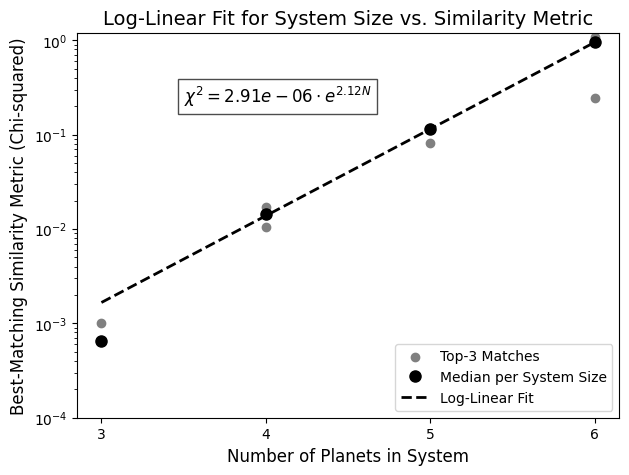

In [59]:
# Re-attempting the code to ensure proper execution

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data: Including top-3 matches for each system size
num_planets_extended = np.array([3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])
chi2_values_extended = np.array([
    4.38141e-06, 6.48425e-04, 1.01439e-03,  # Top-3 for 3-planet systems
    1.05799e-02, 1.45114e-02, 1.72737e-02,  # Top-3 for 4-planet systems
    8.21728e-02, 1.14312e-01, 1.18403e-01,  # Top-3 for 5-planet systems
    2.43406e-01, 9.49420e-01, 1.08678e+00   # Top-3 for 6-planet systems
])

# Compute the median of chi2 values for each planet number
unique_planet_numbers = np.unique(num_planets_extended)
median_chi2_values = [np.median(chi2_values_extended[num_planets_extended == n]) for n in unique_planet_numbers]

# Define a log-linear function for fitting
def log_linear(x, a, b):
    return a * np.exp(b * x)

# Fit the model to the median values
params, _ = curve_fit(log_linear, unique_planet_numbers, median_chi2_values)

# Generate fitted line values
fit_x = np.linspace(min(unique_planet_numbers), max(unique_planet_numbers), 100)
fit_y = log_linear(fit_x, *params)

# Extract fitted parameters for annotation
a_fit, b_fit = params

# Create the improved plot with annotation
# Create the improved plot with refined x-ticks
plt.figure(figsize=(7, 5))
plt.scatter(num_planets_extended, chi2_values_extended, marker='o', color='grey', label="Top-3 Matches")
plt.plot(unique_planet_numbers, median_chi2_values, marker='o', color="black", markersize=8, linestyle="None", label="Median per System Size")
plt.plot(fit_x, fit_y, linestyle='--', color="black", linewidth=2, label="Log-Linear Fit")

# Annotate the fitted equation in an open space of the plot
equation_text = f"$\chi^2 = {a_fit:.2e} \cdot e^{{{b_fit:.2f}N}}$"
plt.text(3.5, max(chi2_values_extended) / 5, equation_text, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.yscale("log")  # Logarithmic scale for chi2 values
plt.ylim(1e-4, 1.2)
plt.xlabel("Number of Planets in System", fontsize=12)
plt.ylabel("Best-Matching Similarity Metric (Chi-squared)", fontsize=12)
plt.title("Log-Linear Fit for System Size vs. Similarity Metric", fontsize=14)
plt.legend(loc="lower right")
plt.xticks(unique_planet_numbers, fontsize=10)  # Only show integer values for planet numbers
plt.yticks(fontsize=10)

# Save the figure with annotation
plt.savefig("./log_linear_trend_median_fit_annotated_fixed.png", dpi=300, bbox_inches='tight')

# Display the figure
plt.show()

